# Classification - Telco Customer Churn

### <font color='red'> Project 2

### Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting.
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with AdaBoost boosting.
- Apply one model with gradient boosting.
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class.
- In all the classification tasks, consider the evaluation function you used in Project 1.

## Introduction

#### Churn Rate

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period.

## Context

"Predict behavior to retain customers. Our goal is to analyze all relevant customer data and develop focused customer retention programs."

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers – gender, age range, and if they have partners and dependents

## Data Description

customerID - Customer ID uniquly identifying record of a customer

gender - Customer gender (female, male)

SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)

Partner - Whether the customer has a partner or not (Yes, No)

Dependents - Whether the customer has dependents or not (Yes, No)

tenure - Number of months the customer has stayed with the company

PhoneService - Whether the customer has a phone service or not (Yes, No)

MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract -The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)

PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges - The amount charged to the customer monthly

TotalCharges - The total amount charged to the customer

Churn -Whether the customer churned or not (Yes or No)

## Data Source

Telco Customer Churn - Focused customer retention programs

Data Source: Kaggle.com
https://www.kaggle.com/blastchar/telco-customer-churn

## Importing Libraries and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Import Data

In [3]:
df = pd.read_excel('C:/Users/PURUSHOTHAMAN MURVAS/Downloads/AML/Project/Project 2/WA_Fn-UseC_-Telco-Customer-Churn-Dataset.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              5605 non-null object
SeniorCitizen       5630 non-null float64
Partner             5570 non-null object
Dependents          7043 non-null object
tenure              5740 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     5635 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       5592 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(3), object(18

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,0.0,NaN,No,NaN,No,No phone service,NaN,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,NaN,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5630.000000,5740.000000,7043.000000
mean,0.161456,32.487108,64.761692
std,0.367984,24.507180,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Imputing Null Values

In [8]:
df.isnull().sum()

customerID             0
gender              1438
SeniorCitizen       1413
Partner             1473
Dependents             0
tenure              1303
PhoneService           0
MultipleLines          0
InternetService     1408
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod       1451
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

In [9]:
#Finding the missing values and percentage
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum())/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(30)

,Total,Percent
Partner,1473,0.209144
PaymentMethod,1451,0.206020
gender,1438,0.204174
SeniorCitizen,1413,0.200625
InternetService,1408,0.199915
tenure,1303,0.185006
DeviceProtection,0,0.000000
MonthlyCharges,0,0.000000
PaperlessBilling,0,0.000000
Contract,0,0.000000


In [10]:
#Using mean and mode to impute the missing values for the following columns

df['Partner'].fillna(df['Partner'].mode()[0], inplace=True)
df['PaymentMethod'].fillna(df['PaymentMethod'].mode()[0], inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0], inplace=True)
df['InternetService'].fillna(df['InternetService'].mode()[0], inplace=True)
df['tenure'].fillna(df['tenure'].mean(), inplace=True)

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,No,No,1.000000,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.000000,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.000000,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,32.487108,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,32.487108,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(3), object(18

## Data Exploration

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Understand the Churn Colum

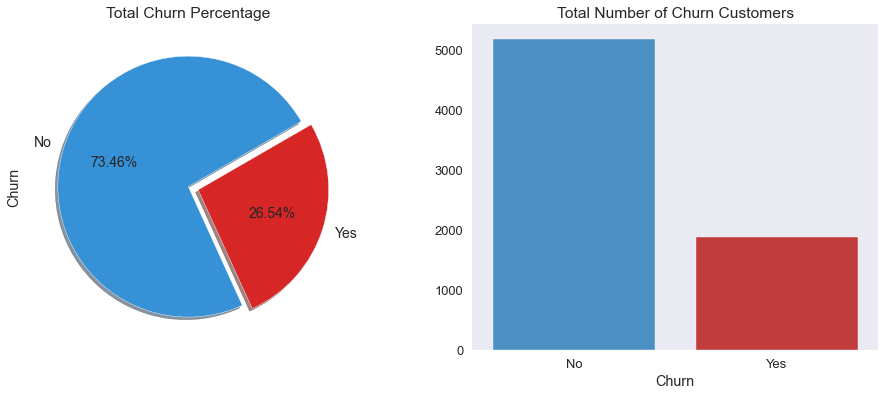

In [14]:
plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))

df['Churn'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=["#3791D7", "#D72626"])
ax[0].set_title('Total Churn Percentage')

sns.countplot('Churn', data=df, ax=ax[1], palette=["#3791D7", "#D72626"])
ax[1].set_title('Total Number of Churn Customers')
ax[1].set_ylabel(' ')

plt.show()

The data shows that 26.54% of the company's customers have decided to cut ties. 

### Churn VS Other Columns

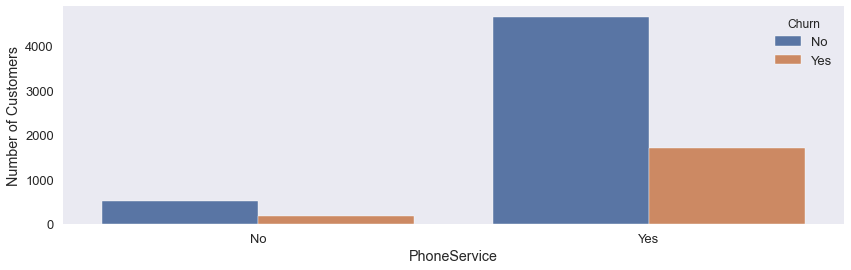

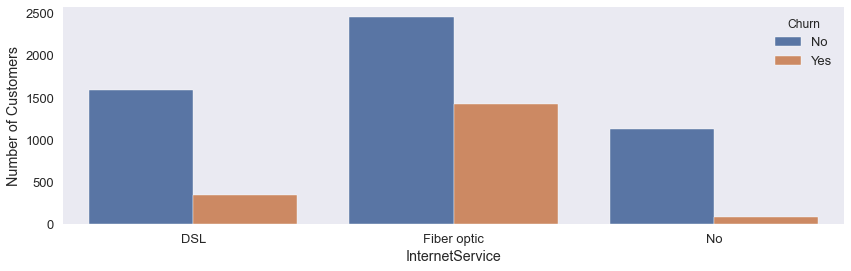

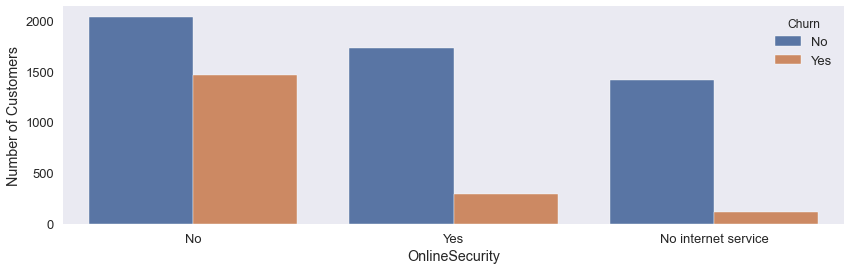

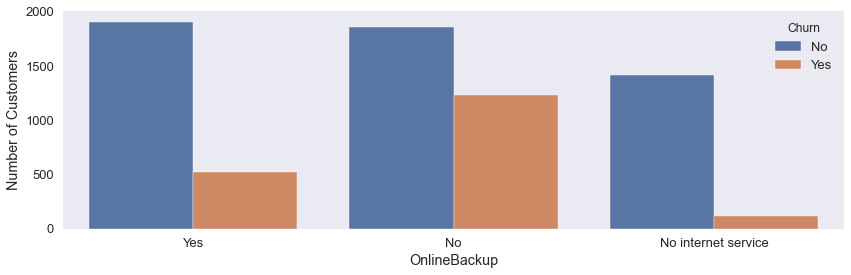

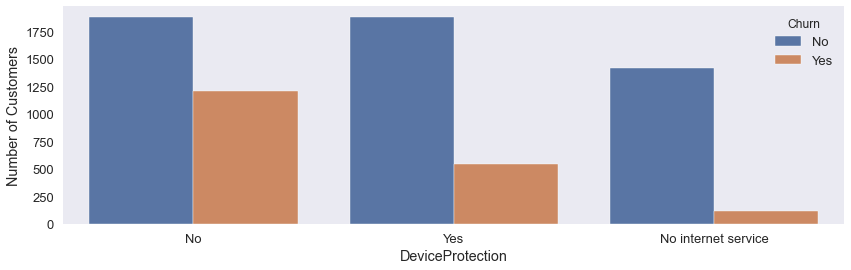

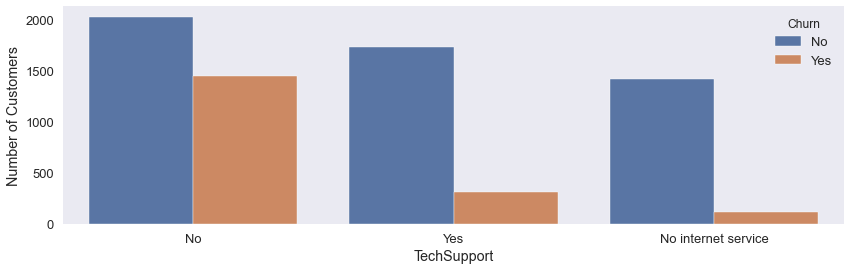

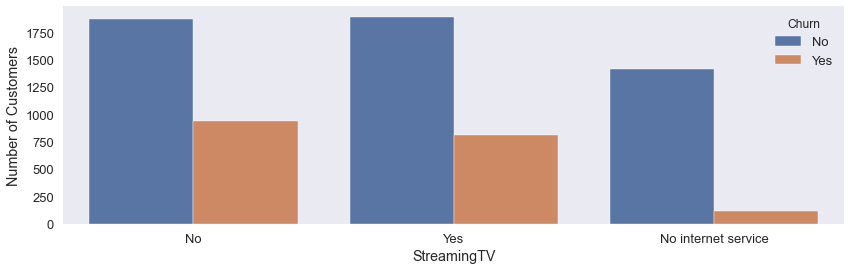

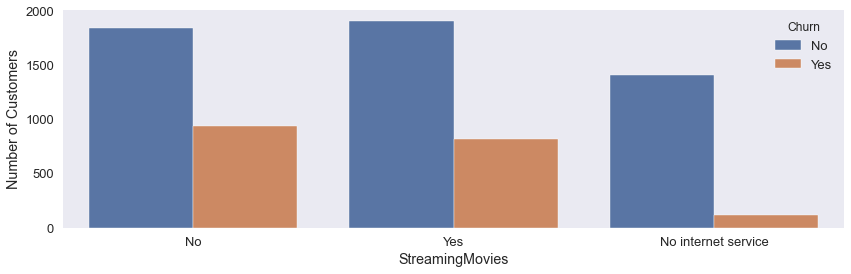

In [15]:
cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in cols:
    plt.figure(figsize=(14,4))
    sns.countplot(x=i, hue='Churn', data=df)
    plt.ylabel('Number of Customers')
    plt.show()

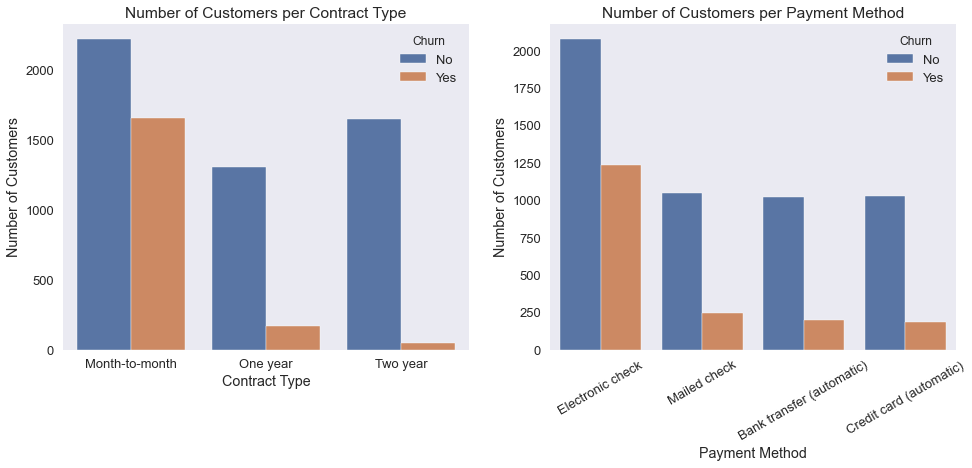

In [16]:
plt.style.use(['seaborn-dark','seaborn-talk'])
fig, ax = plt.subplots(1,2,figsize=(16,6))

sns.countplot(x='Contract', data=df, hue='Churn', ax=ax[0])
ax[0].set_title('Number of Customers per Contract Type')
ax[0].set_xlabel('Contract Type')
ax[0].set_ylabel('Number of Customers')

sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 30)
ax[1].set_title('Number of Customers per Payment Method')
ax[1].set_xlabel('Payment Method')
ax[1].set_ylabel('Number of Customers')

plt.show()

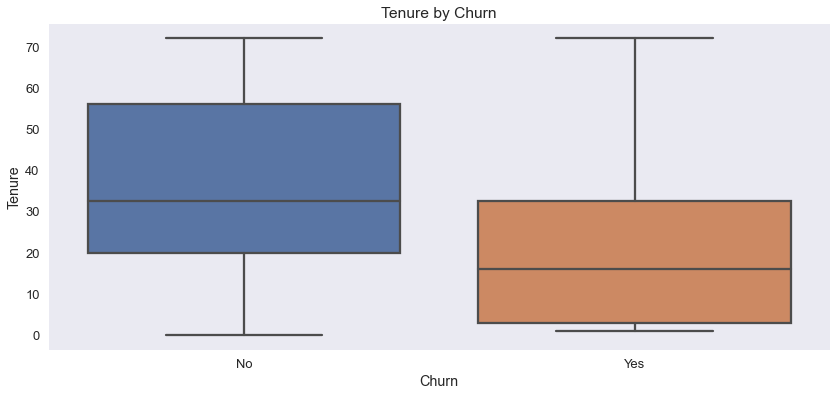

In [17]:
plt.figure(figsize=(14,6))

sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')

plt.show()

In [18]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

### Tenure Column

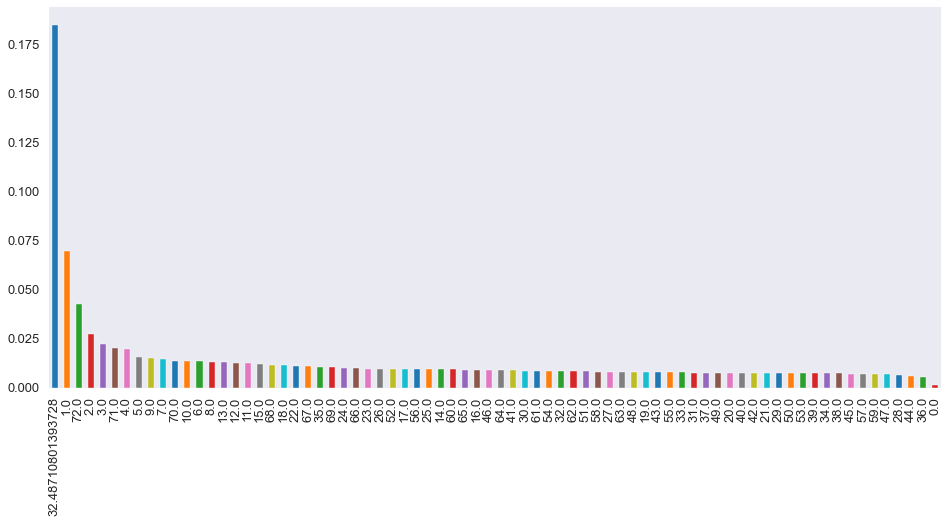

In [19]:
df.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7),color=colors);

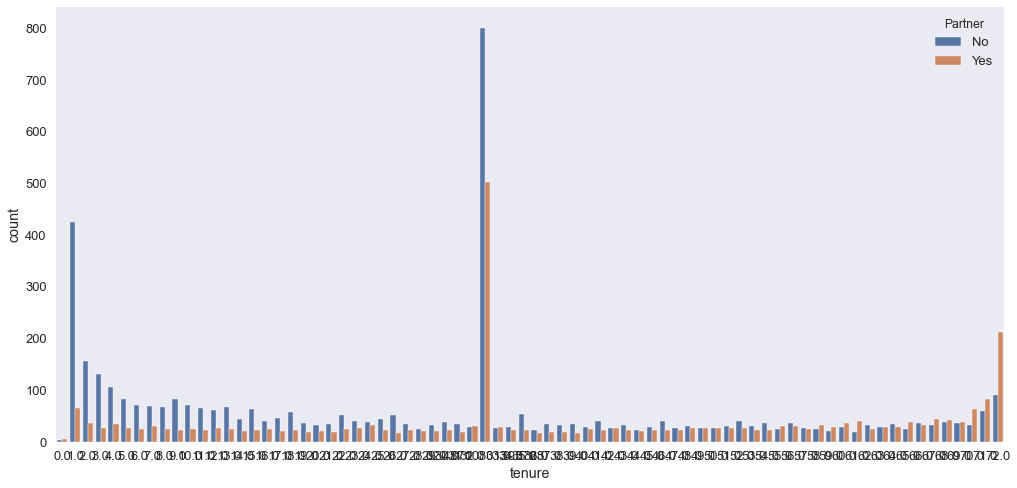

In [20]:
plt.figure(figsize=(17,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

### Online Security

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

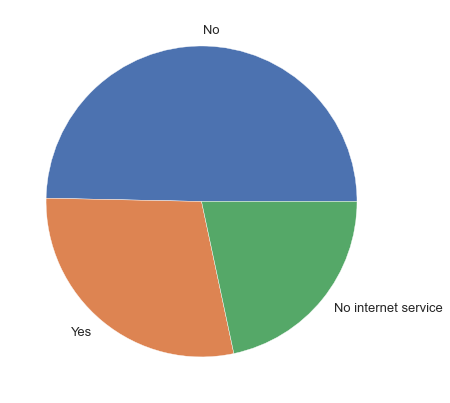

In [21]:
plt.pie(df['OnlineSecurity'].value_counts(),labels=df['OnlineSecurity'].unique())
df['OnlineSecurity'].value_counts()

### Histogram

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-pack

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C33DDD160>,
      dtype=object)

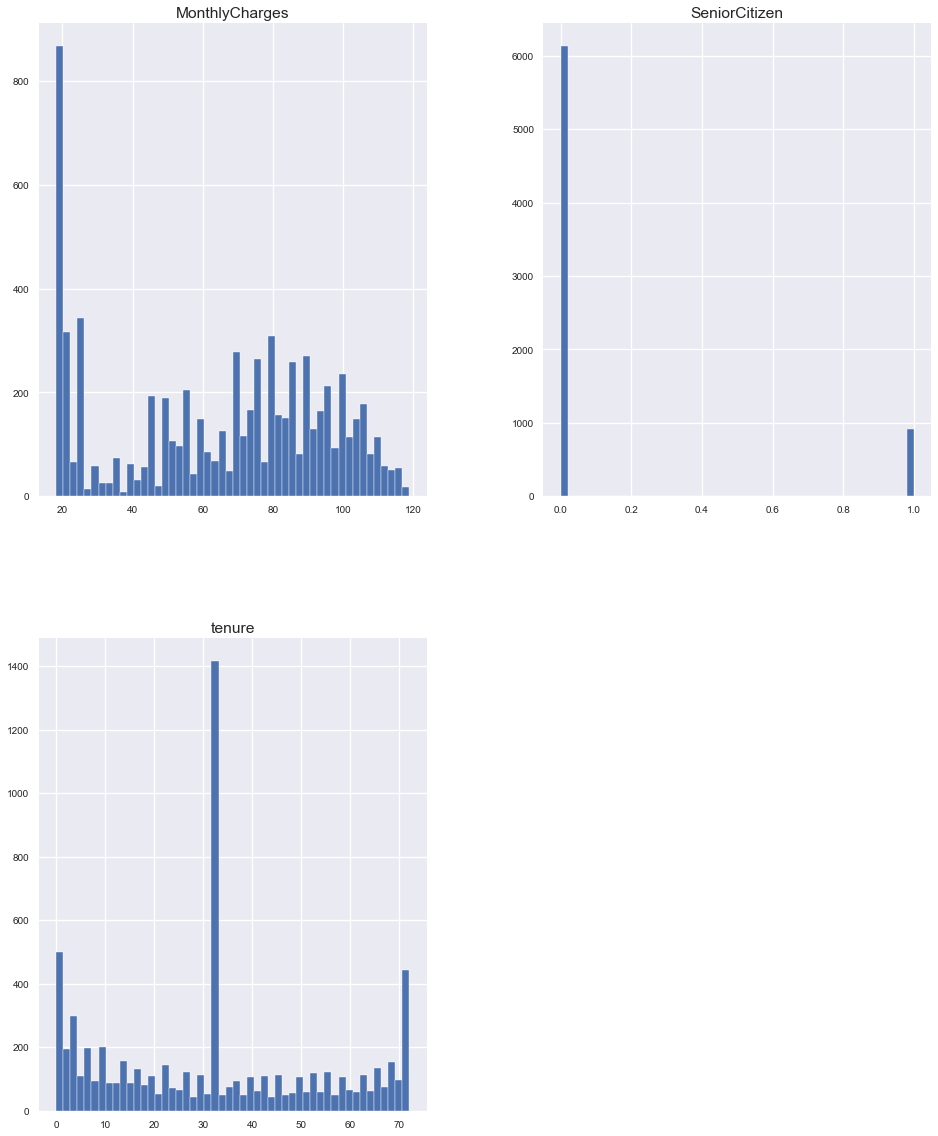

In [22]:
df.hist(figsize=(16,20),bins=50,xlabelsize=10,ylabelsize=10)

### Correlation Matrix

In [23]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
for i in df.columns:
    df[i] = number.fit_transform(df[i].astype('str'))

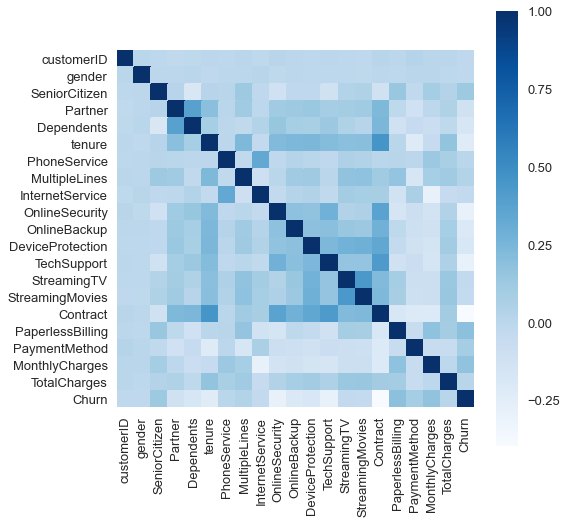

In [24]:
features_correlation = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

## Data Analysis

### Pre-Processing

In [25]:
#Dropping Customer ID Column
df.drop(['customerID'],axis=1,inplace= True)

In [26]:
# Converting string to float for Total Charges Column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [27]:
#Getting dummies for Categorical columns
df = pd.get_dummies(df,columns=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
                                'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [28]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_0',
       'gender_1', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_0',
       'Partner_1', 'Dependents_0', 'Dependents_1', 'PhoneService_0',
       'PhoneService_1', 'MultipleLines_0', 'MultipleLines_1',
       'MultipleLines_2', 'InternetService_0', 'InternetService_1',
       'InternetService_2', 'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_2', 'TechSupport_0', 'TechSupport_1', 'TechSupport_2',
       'StreamingTV_0', 'StreamingTV_1', 'StreamingTV_2', 'StreamingMovies_0',
       'StreamingMovies_1', 'StreamingMovies_2', 'Contract_0', 'Contract_1',
       'Contract_2', 'PaperlessBilling_0', 'PaperlessBilling_1',
       'PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2',
       'PaymentMethod_3'],
      dtype='object')

In [29]:
df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,1,446,2505,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,29,802,1466,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,12,740,157,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,27,570,1400,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,27,1033,925,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Data Processing

In [30]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [31]:
X.describe()

,tenure,MonthlyCharges,TotalCharges,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,34.082067,783.182877,3257.794122,0.397558,0.602442,0.870936,0.129064,0.618770,0.381230,0.700412,...,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.173080,0.172370,0.470254,0.184296
std,22.210684,466.006171,1888.693496,0.489428,0.489428,0.335295,0.335295,0.485723,0.485723,0.458110,...,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.378343,0.377728,0.499150,0.387753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,338.000000,1609.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,761.000000,3249.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,53.000000,1204.000000,4901.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,73.000000,1584.000000,6530.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#Split the data to train and test sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [33]:
#Standardize the training and test sets
scaler = MinMaxScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Check the number of records in training and test partitions
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (5282, 46)
X_test : (1761, 46)
y_train : (5282,)
y_test : (1761,)


In [34]:
X_train_df = pd.DataFrame(X_train, columns= X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)
X_test_df.head()

,tenure,MonthlyCharges,TotalCharges,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0.369863,0.513889,0.013323,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.794521,0.181187,0.848851,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.068493,0.667298,0.976723,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.013699,0.215909,0.247320,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.712329,0.731692,0.556968,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [35]:
X_test_df.describe()

,tenure,MonthlyCharges,TotalCharges,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,...,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
count,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,...,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000,1761.000000
mean,0.455073,0.489303,0.492071,0.377626,0.622374,0.873367,0.126633,0.624645,0.375355,0.705281,...,0.392391,0.541170,0.203294,0.255537,0.423623,0.576377,0.172629,0.178308,0.471323,0.177740
std,0.301435,0.297390,0.290455,0.484931,0.484931,0.332655,0.332655,0.484352,0.484352,0.456046,...,0.488422,0.498444,0.402563,0.436286,0.494272,0.494272,0.378034,0.382880,0.499319,0.382402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.219178,0.212121,0.245023,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.369863,0.472222,0.483920,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.712329,0.759470,0.741348,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.999847,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  Voting Classifier

### Voting Classifier - Hard

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [38]:
log_clf = LogisticRegression(C=1, penalty = 'l1',solver = 'liblinear')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(15)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 100, gamma=0.01, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7819420783645656
KNeighborsClassifier 0.7546848381601363
SVC 0.7819420783645656
VotingClassifier 0.7819420783645656


### Voting Classifier - Soft

In [39]:
log_clf = LogisticRegression(C=1, penalty = 'l1',solver = 'liblinear')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(15)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 100, gamma=0.01, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7819420783645656
KNeighborsClassifier 0.7546848381601363
SVC 0.7819420783645656
VotingClassifier 0.7847813742191937


# Bagging and Pasting

### KNN - Bagging 

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=15)
bag_clf = BaggingClassifier(knn_clf, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [41]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.7999
Test score: 0.7598


### F1 Score for KNN - Bagging

In [42]:
from sklearn.metrics import f1_score
print("F1 Score for KNN - Bagging on training set {:.4f}".format(f1_score(y_train,bag_clf.predict(X_train) , average='micro')))
print("F1 Score for KNN - Bagging on test set {:.4f}".format(f1_score(y_test,bag_clf.predict(X_test) , average='micro')))

F1 Score for KNN - Bagging on training set 0.7999
F1 Score for KNN - Bagging on test set 0.7598


### Decision Tree - Bagging 

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 5, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [44]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.7959
Test score: 0.7871


### F1 Score for Decision Tree - Bagging

In [45]:
from sklearn.metrics import f1_score
print("F1 Score for Decision Tree - Bagging on training set {:.4f}".format(f1_score(y_train,bag_clf.predict(X_train) , average='micro')))
print("F1 Score for Decision Tree - Bagging on test set {:.4f}".format(f1_score(y_test,bag_clf.predict(X_test) , average='micro')))

F1 Score for Decision Tree - Bagging on training set 0.7959
F1 Score for Decision Tree - Bagging on test set 0.7871


### KNN - Pasting

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=15)
bag_clf = BaggingClassifier(knn_clf, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [47]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.7957
Test score: 0.7547


### F1 Score for KNN - Pasting

In [48]:
from sklearn.metrics import f1_score
print("F1 Score for KNN - Pasting on training set {:.4f}".format(f1_score(y_train,bag_clf.predict(X_train) , average='micro')))
print("F1 Score for KNN - Pasting on test set {:.4f}".format(f1_score(y_test,bag_clf.predict(X_test) , average='micro')))

F1 Score for KNN - Pasting on training set 0.7957
F1 Score for KNN - Pasting on test set 0.7547


### Decision Tree - Pasting 

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 5, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=100, max_samples=0.1, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [50]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.8008
Test score: 0.7774


### F1 Score for Decision Tree - Pasting

In [51]:
from sklearn.metrics import f1_score
print("F1 Score for Decision Tree - Pasting on training set {:.4f}".format(f1_score(y_train,bag_clf.predict(X_train) , average='micro')))
print("F1 Score for Decision Tree - Pasting on test set {:.4f}".format(f1_score(y_test,bag_clf.predict(X_test) , average='micro')))

F1 Score for Decision Tree - Pasting on training set 0.8008
F1 Score for Decision Tree - Pasting on test set 0.7774


# Adaboost Boosting

### Decision Tree - AdaBoost Boosting

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [53]:
print("Accuracy on training set: {:.4f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.9385
Accuracy on test set: 0.7666


### F1 Score for Decision Tree - AdaBoost Boosting

In [54]:
from sklearn.metrics import f1_score
print("F1 Score for Decision Tree - AdaBoost Boosting on training set {:.4f}".format(f1_score(y_train,ada_clf.predict(X_train) , average='micro')))
print("F1 Score for Decision Tree - AdaBoost Boosting on test set {:.4f}".format(f1_score(y_test,ada_clf.predict(X_test) , average='micro')))

F1 Score for Decision Tree - AdaBoost Boosting on training set 0.9385
F1 Score for Decision Tree - AdaBoost Boosting on test set 0.7666


### Logistic Regression - AdaBoost Boosting

In [55]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(LogisticRegression(C=1000, penalty = 'l2'), n_estimators=100, algorithm="SAMME.R", learning_rate=0.1, random_state=0)
ada_clf.fit(X_train, y_train)

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1000, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=0.1, n_estimators=100, random_state=0)

In [56]:
print("Accuracy on training set: {:.4f}".format(ada_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(ada_clf.score(X_test, y_test)))

Accuracy on training set: 0.7891
Accuracy on test set: 0.7797


### F1 Score for Logistic Regression - AdaBoost Boosting

In [57]:
from sklearn.metrics import f1_score
print("F1 Score for Logistic Regression - AdaBoost Boosting on training set {:.4f}".format(f1_score(y_train,ada_clf.predict(X_train) , average='micro')))
print("F1 Score for Logistic Regression - AdaBoost Boosting on test set {:.4f}".format(f1_score(y_test,ada_clf.predict(X_test) , average='micro')))

F1 Score for Logistic Regression - AdaBoost Boosting on training set 0.7891
F1 Score for Logistic Regression - AdaBoost Boosting on test set 0.7797


# Gradient Boosting

### Decision Tree - Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=5, n_estimators=50, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
print("Accuracy on training set: {:.4f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.8508
Accuracy on test set: 0.7802


### F1 Score for Decision Tree - Gradient Boosting

In [60]:
from sklearn.metrics import f1_score
print("F1 Score for Decision Tree - Gradient Boosting on training set {:.4f}".format(f1_score(y_train,gbrt.predict(X_train) , average='micro')))
print("F1 Score for Decision Tree - Gradient Boosting on test set {:.4f}".format(f1_score(y_test,gbrt.predict(X_test) , average='micro')))

F1 Score for Decision Tree - Gradient Boosting on training set 0.8508
F1 Score for Decision Tree - Gradient Boosting on test set 0.7802


#  Principal Component Analysis (PCA)

In [61]:
from sklearn.decomposition import PCA
pca_classification = PCA(n_components = .95)
X_train_class = pca_classification.fit_transform(X_train)
X_test_class = pca_classification.transform(X_test)

In [62]:
pca_classification.n_components_

19

### Model 1 - KNN Classifier 

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1,20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 19}
Best cross-validation score: 0.7624


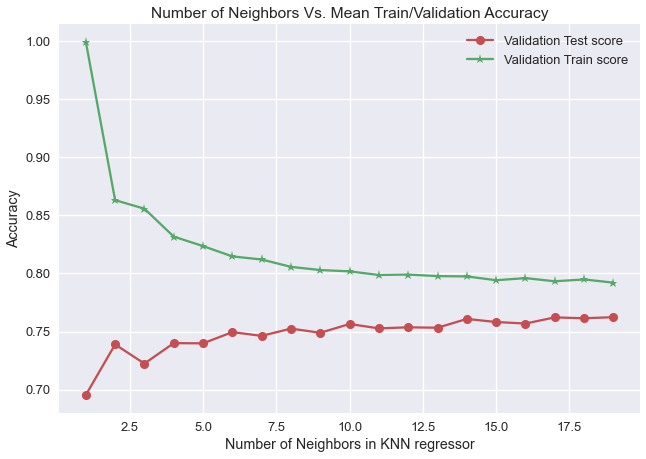

In [70]:
results = pd.DataFrame(grid_search.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Number of Neighbors Vs. Mean Train/Validation Accuracy')
plt.xlabel('Number of Neighbors in KNN regressor')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()


In [71]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_class, y_train)
print('Train score on best parameters {:.4f}'.format(knn.score(X_train_class,y_train)))
print('Test score on best parameters {:.4f}'.format(knn.score(X_test_class,y_test)))

Train score on best parameters 0.7902
Test score on best parameters 0.7547


### F1 Score for Model 1 - KNN Classifier

In [72]:
from sklearn.metrics import f1_score
print("F1 Score for Model 1 - KNN Classifier on training set {:.4f}".format(f1_score(y_train,knn.predict(X_train_class) , average='micro')))
print("F1 Score for Model 1 - KNN Classifier on test set {:.4f}".format(f1_score(y_test,knn.predict(X_test_class) , average='micro')))

F1 Score for Model 1 - KNN Classifier on training set 0.7902
F1 Score for Model 1 - KNN Classifier on test set 0.7547


### Adding results to post_pca_class(post_pca_classification_results)

In [73]:
post_pca_class = pd.DataFrame(columns=('S.No','Model_Name','Parameters', 'Train_Score', 'Test_Score'))

In [74]:
post_pca_class.loc[len(post_pca_class)]=[1,'KNN Classifier','n_neighbors: 19',knn.score(X_train_class,y_train),knn.score(X_test_class,y_test)]

In [75]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,n_neighbors: 19,0.790231,0.754685


In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix

predicted = cross_val_predict(grid_search,X_test,y_test, cv=5)
confusion = confusion_matrix(y_test, predicted)

In [77]:
from sklearn.metrics import classification_report
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, predicted, target_names=["No", "Yes"]))

Confusion matrix:
[[1126  172]
 [ 252  211]]
              precision    recall  f1-score   support

          No       0.82      0.87      0.84      1298
         Yes       0.55      0.46      0.50       463

    accuracy                           0.76      1761
   macro avg       0.68      0.66      0.67      1761
weighted avg       0.75      0.76      0.75      1761



### Model 2 - Logistic Regression

##### Grid search to find the best parameters for the model

In [78]:
from sklearn.linear_model import LogisticRegression

param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100], 'penalty':['l1','l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid_svm, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defau

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best cross-validation score: 0.7876


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Building the mdoel on the best parameter 

In [79]:
lg = LogisticRegression(C=0.1,penalty='l2').fit(X_train_class, y_train)
print('Train score on best parameters for Logistic Regression model {:.4f}'.format(lg.score(X_train_class,y_train)))
print('Test score on best parameters for Logistic Regression model {:.4f}'.format(lg.score(X_test_class,y_test)))

Train score on best parameters for Logistic Regression model 0.7914
Test score on best parameters for Logistic Regression model 0.7791


C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### F1 Score for Model 2 - Logistic Regression

In [80]:
from sklearn.metrics import f1_score
print("F1 Score for Model 2 - Logistic Regression on training set {:.4f}".format(f1_score(y_train,lg.predict(X_train_class) , average='micro')))
print("F1 Score for Model 2 - Logistic Regression on test set {:.4f}".format(f1_score(y_test,lg.predict(X_test_class) , average='micro')))

F1 Score for Model 2 - Logistic Regression on training set 0.7914
F1 Score for Model 2 - Logistic Regression on test set 0.7791


In [81]:
post_pca_class.loc[len(post_pca_class)]=[2,'Logistic Model',grid_search.best_params_,lg.score(X_train_class,y_train),lg.score(X_test_class,y_test)]

In [82]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,n_neighbors: 19,0.790231,0.754685
1,2,Logistic Model,"{'C': 0.1, 'penalty': 'l2'}",0.791367,0.779103


##### Confusion matrix for the model 

Confusion matrix for test:
[[1151  147]
 [ 242  221]]
Confusion matrix for train:
[[3436  440]
 [ 662  744]]


<Figure size 288x216 with 0 Axes>

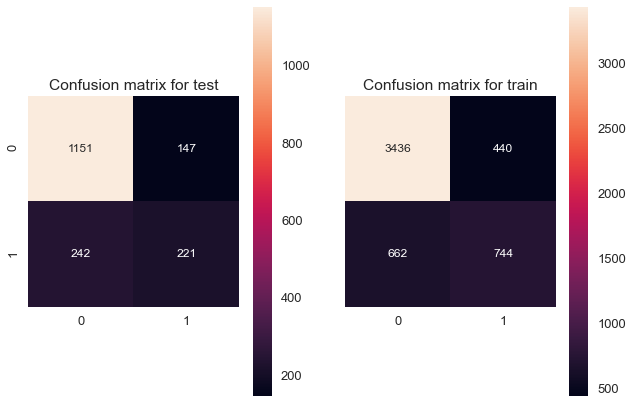

In [120]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
pred_logreg_test = lg.predict(X_test_class)
pred_logreg_train = lg.predict(X_train_class)
confusion_test = confusion_matrix(y_test, pred_logreg_test)
confusion_train = confusion_matrix(y_train, pred_logreg_train)
plt.figure(figsize=(4, 3))
f,(ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.set_title("Confusion matrix for test")
ax2.set_title("Confusion matrix for train")
print("Confusion matrix for test:\n{}".format(confusion_test))
sns.heatmap(confusion_test, annot=True,fmt='d',square=True,ax=ax1)
print("Confusion matrix for train:\n{}".format(confusion_train))
sns.heatmap(confusion_train, annot=True,fmt='d',square=True,ax=ax2)

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg_test, target_names=["Churn 0", "Churn 1"]))

              precision    recall  f1-score   support

     Churn 0       0.83      0.89      0.86      1298
     Churn 1       0.60      0.48      0.53       463

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



### Model 3 - Support Vector Machine Classifier 

##### Grid Search to find the best parameters 

In [118]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100], 'degree':[1,3,5]}

grid_search = GridSearchCV(SVC(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Test set score: {:.2f}".format(grid_search.score(X_test_class, y_test)))

Best parameters: {'C': 1, 'degree': 1, 'gamma': 0.1}
Best cross-validation score: 0.78
Test set score: 0.78


##### Building the model for different kernels in  SVC 

In [122]:
clf1 = LinearSVC(C=1).fit(X_train_class, y_train)
clf2 = SVC(kernel='linear', C=1).fit(X_train_class, y_train)
clf3 = SVC(kernel='rbf', gamma=0.1, C=1).fit(X_train_class, y_train)
clf4 = SVC(kernel='poly', degree=1, C=1).fit(X_train_class, y_train)
print('Train score on best parameters for LinearSVC - {:.4f}'.format(clf1.score(X_train_class, y_train)))
print('Test score on best parameters ffor LinearSVC - {:.4f}'.format(clf1.score(X_test_class,y_test)))

print('Train score on best parameters for SVC kernel - Linear {:.4f}'.format(clf2.score(X_train_class,y_train)))
print('Test score on best parameters for SVC kernel - Linear {:.4f}'.format(clf2.score(X_test_class,y_test)))

print('Train score on best parameters for SVC kernel - rbf {:.4f}'.format(clf3.score(X_train_class,y_train)))
print('Test score on best parameters for SVC kernel - rbf {:.4f}'.format(clf3.score(X_test_class,y_test)))

print('Train score on best parameters for SVC kernel - poly {:.4f}'.format(clf4.score(X_train_class,y_train)))
print('Test score on best parameters for SVC kernel - poly {:.4f}'.format(clf4.score(X_test_class,y_test)))

C:\Users\PURUSHOTHAMAN MURVAS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score on best parameters for LinearSVC - 0.7900
Test score on best parameters ffor LinearSVC - 0.7791
Train score on best parameters for SVC kernel - Linear 0.7864
Test score on best parameters for SVC kernel - Linear 0.7740
Train score on best parameters for SVC kernel - rbf 0.8050
Test score on best parameters for SVC kernel - rbf 0.7785
Train score on best parameters for SVC kernel - poly 0.7880
Test score on best parameters for SVC kernel - poly 0.7785


### F1 Score for Model 3 - Support Vector Machine Classifier

In [123]:
from sklearn.metrics import f1_score

print("F1 Score for LinearSVC on training set {:.4f}".format(f1_score(y_train,clf1.predict(X_train_class) , average='micro')))
print("F1 Score for LinearSVC on test set {:.4f}".format(f1_score(y_test,clf1.predict(X_test_class) , average='micro')))

print("F1 Score for SVC kernel - Linear on training set {:.4f}".format(f1_score(y_train,clf2.predict(X_train_class) , average='micro')))
print("F1 Score for SVC kernel - Linear on test set {:.4f}".format(f1_score(y_test,clf2.predict(X_test_class) , average='micro')))

print("F1 Score for SVC kernel - rbf on training set {:.4f}".format(f1_score(y_train,clf3.predict(X_train_class) , average='micro')))
print("F1 Score for SVC kernel - rbf on test set {:.4f}".format(f1_score(y_test,clf3.predict(X_test_class) , average='micro')))

print("F1 Score for SVC kernel - poly on training set {:.4f}".format(f1_score(y_train,clf4.predict(X_train_class) , average='micro')))
print("F1 Score for SVC kernel - poly on test set {:.4f}".format(f1_score(y_test,clf4.predict(X_test_class) , average='micro')))

F1 Score for LinearSVC on training set 0.7900
F1 Score for LinearSVC on test set 0.7791
F1 Score for SVC kernel - Linear on training set 0.7864
F1 Score for SVC kernel - Linear on test set 0.7740
F1 Score for SVC kernel - rbf on training set 0.8050
F1 Score for SVC kernel - rbf on test set 0.7785
F1 Score for SVC kernel - poly on training set 0.7880
F1 Score for SVC kernel - poly on test set 0.7785


##### Vizualizing the scores of various kernelized SVM 

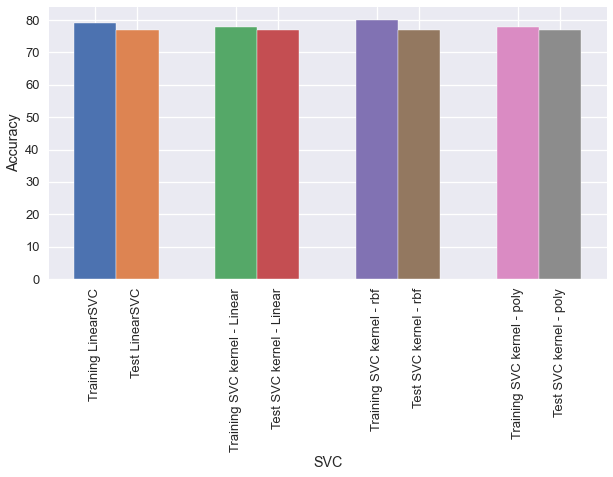

In [124]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.3
plt.xlabel('SVC')
plt.ylabel('Accuracy')
labels = ['Training LinearSVC','Test LinearSVC','Training SVC kernel - Linear','Test SVC kernel - Linear','Training SVC kernel - rbf',
          'Test SVC kernel - rbf','Training SVC kernel - poly','Test SVC kernel - poly']
labels1 = ['Training LinearSVC','Test LinearSVC','Training SVC kernel - Linear','Test SVC kernel - Linear','Training SVC kernel - rbf',
          'Test SVC kernel - rbf','Training SVC kernel - poly','Test SVC kernel - poly']
list_ticks = [0,.3,1,1.3,2,2.3,3,3.3]
ax.set_xticks(list_ticks)
for j in range(0,4,1) :
    ax.set_xticklabels(labels,rotation=90)
    ax.set_xticklabels(labels1,rotation=90)
accuracies_train=[79,78,80,78]
accuracies_test=[77,77,77,77]
for i in range(0,4,1) :
    ax.bar(i,accuracies_train[i],width)
    ax.bar(i+width,accuracies_test[i],width)
plt.grid()

In [125]:
post_pca_class.loc[len(post_pca_class)]=[3,'Linear SVC',grid_search.best_params_,clf1.score(X_train_class, y_train),clf1.score(X_test_class, y_test)]
post_pca_class.loc[len(post_pca_class)]=[4,'SVC Kernel- Linear',grid_search.best_params_,clf2.score(X_train_class, y_train),clf2.score(X_test_class, y_test)]
post_pca_class.loc[len(post_pca_class)]=[5,'SVC Kernel - RBF',grid_search.best_params_,clf3.score(X_train_class, y_train),clf3.score(X_test_class, y_test)]
post_pca_class.loc[len(post_pca_class)]=[6,'SVC Kernal - Polynomial',grid_search.best_params_,clf4.score(X_train_class, y_train),clf4.score(X_test_class, y_test)]

In [126]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,n_neighbors: 19,0.790231,0.754685
1,2,Logistic Model,"{'C': 0.1, 'penalty': 'l2'}",0.791367,0.779103
2,3,Linear SVC,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.790042,0.779103
3,4,SVC Kernel- Linear,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.786445,0.773992
4,5,SVC Kernel - RBF,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.804998,0.778535
5,6,SVC Kernal - Polynomial,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.787959,0.778535


###  Model 4 - Decision Tree Classifier

##### Grid search to find best parameters for the model

In [127]:
param_grid = {'max_depth': np.arange(1, 10)}
grid_search.fit(X_train_class, y_train)
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_class, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2}
Best cross-validation score: 0.7702


#####  Building the model on best parameters

In [128]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train_class, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(X_train_class, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test_class, y_test)))

Accuracy on training set: 0.7764
Accuracy on test set: 0.7626


### F1 Score for Model 4 - Decision Tree Classifier

In [129]:
from sklearn.metrics import f1_score
print("F1 Score for Model 4 - Decision Tree Classifier on training set {:.4f}".format(f1_score(y_train,dtree.predict(X_train_class) , average='micro')))
print("F1 Score for Model 4 - Decision Tree Classifier on test set {:.4f}".format(f1_score(y_test,dtree.predict(X_test_class) , average='micro')))

F1 Score for Model 4 - Decision Tree Classifier on training set 0.7764
F1 Score for Model 4 - Decision Tree Classifier on test set 0.7626


In [130]:
post_pca_class.loc[len(post_pca_class)]=[7,'Decision tree Classifier',grid_search.best_params_,dtree.score(X_train_class, y_train),dtree.score(X_test_class, y_test)]

In [131]:
post_pca_class

,S.No,Model_Name,Parameters,Train_Score,Test_Score
0,1,KNN Classifier,n_neighbors: 19,0.790231,0.754685
1,2,Logistic Model,"{'C': 0.1, 'penalty': 'l2'}",0.791367,0.779103
2,3,Linear SVC,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.790042,0.779103
3,4,SVC Kernel- Linear,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.786445,0.773992
4,5,SVC Kernel - RBF,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.804998,0.778535
5,6,SVC Kernal - Polynomial,"{'C': 1, 'degree': 1, 'gamma': 0.1}",0.787959,0.778535
6,7,Decision tree Classifier,{'max_depth': 2},0.776410,0.762635


Text(0, 0.5, 'AccuracyScore')

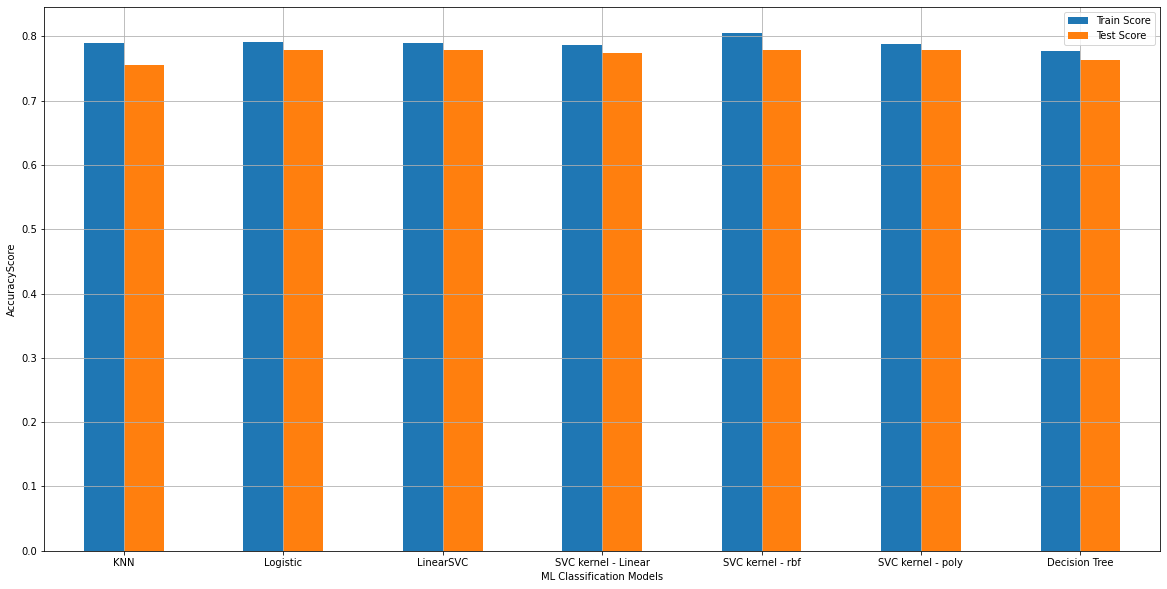

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
Trainscore = [0.7902,0.7913,0.7900,0.7864,0.8049,0.7879,0.7764]
Testscore  = [0.7546,0.7791,0.7791,0.7739,0.7785,0.7785,0.7626]
#plt.figure(figsize=(15,5))
index = ['KNN','Logistic','LinearSVC','SVC kernel - Linear','SVC kernel - rbf','SVC kernel - poly','Decision Tree']
df = pd.DataFrame({'Train Score': Trainscore,
                   'Test Score': Testscore}, index=index)

ax = df.plot.bar(rot=0,figsize=(20,10),grid=True)
plt.xlabel("ML Classification Models")
plt.ylabel("AccuracyScore")


###  Comparing accuracies for Classification models before and after PCA

In [132]:
# Index Levels
outside = ['Before PCA(Project 1)','Before PCA(Project 1)','After PCA(Project 2)','After PCA(Project 2)']
inside = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [133]:
data_class = np.array([(0.80,0.79,0.79,0.79,0.80,0.79,0.79),
                     (0.76,0.78,0.78,0.78,0.79,0.78,0.78),
                     (0.79,0.79,0.79,0.78,0.80,0.78,0.77),
                     (0.75,0.77,0.77,0.77,0.77,0.77,0.76)])

In [134]:
df = pd.DataFrame(data_class,index=hier_index,columns=['KNN','Logistic','LinearSVC','SVC kernel - Linear','SVC kernel - rbf','SVC kernel - poly','Decision Tree'])


In [135]:
import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap=True)

s = df.style.background_gradient(cmap='RdYlGn')
s

## Does PCA help in getting better results?

1. Before PCA in Project 1, the best model was the SVC Kernal - RBF with Train score of 0.80 and Test score of 0.79
2. After PCA, we do not see anything better than the Project 1 models. Infact, the model performance have reduced after PCA.
3. The number of features have been reduced to 19 from 46. But this does not help us to get better results. 


# Task 6 - Deep Learning Models

In [140]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

## Single Layer Perceptron

In [141]:
def create_model():
    #step 1: build model
    model = Sequential()
    #input layer
    model.add(Dense(12, input_dim = 46, activation = 'relu'))
    #hidden layers
    #output layer
    model.add(Dense(1, activation = 'sigmoid'))
    #step 2: make computational graph - compile
    model.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )
    return model

In [142]:
seed = 10
np.random.seed(10)

In [143]:
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,30,40] , 'epochs':[50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [144]:
grid_search_result = grid_search.fit(X_train, y_train)

In [145]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 10, 'epochs': 50}
Best cross-validation score: 0.78


In [146]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(12, input_dim = 46, activation = 'relu'))
#hidden layers
#output layer
model1.add(Dense(1, activation = 'sigmoid'))
#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [147]:
# Fit the model
model1.fit(X_train, y_train.values, epochs=100, batch_size=30)

Epoch 1/100
177/177 [==============================] - 0s 723us/step - loss: 0.5568 - accuracy: 0.6952
Epoch 2/100
177/177 [==============================] - 0s 671us/step - loss: 0.4514 - accuracy: 0.7836
Epoch 3/100
177/177 [==============================] - 0s 678us/step - loss: 0.4375 - accuracy: 0.7866
Epoch 4/100
177/177 [==============================] - 0s 706us/step - loss: 0.4315 - accuracy: 0.7902
Epoch 5/100
177/177 [==============================] - 0s 710us/step - loss: 0.4284 - accuracy: 0.7870
Epoch 6/100
177/177 [==============================] - 0s 654us/step - loss: 0.4272 - accuracy: 0.7906
Epoch 7/100
177/177 [==============================] - 0s 666us/step - loss: 0.4253 - accuracy: 0.7910
Epoch 8/100
177/177 [==============================] - 0s 685us/step - loss: 0.4258 - accuracy: 0.7916
Epoch 9/100
177/177 [==============================] - 0s 694us/step - loss: 0.4241 - accuracy: 0.7925
Epoch 10/100
177/177 [==============================] - 0s 736us/step - l

### Evaluation Metrics

In [148]:
model1.evaluate(X_train, y_train.values)

166/166 [==============================] - 0s 587us/step - loss: 0.3965 - accuracy: 0.8061


[0.3965080976486206, 0.806134045124054]

In [149]:
model1.evaluate(X_test, y_test.values)

56/56 [==============================] - 0s 606us/step - loss: 0.4677 - accuracy: 0.7746


[0.46771541237831116, 0.7745599150657654]

#### Prediction Score

In [152]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [151]:
from sklearn.metrics import precision_score
print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.6499215070643642
test 0.5833333333333334


# 2.Multi-Level Perceptron

In [153]:
def create_model1():
    #step 1: build model
    model1 = Sequential()
    #input layer
    model1.add(Dense(30, input_dim = 46, activation = 'relu'))
    #hidden layers
    model1.add(Dense(20, activation = 'relu'))
    model1.add(Dense(10, activation = 'relu'))
    #output layer
    model1.add(Dense(1, activation = 'sigmoid'))

    #step 2: make computational graph - compile
    model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )
    return model1

In [154]:
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,30,40] , 'epochs':[50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [155]:
grid_search_result = grid_search.fit(X_train, y_train)

In [156]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'batch_size': 40, 'epochs': 50}
Best cross-validation score: 0.78


In [157]:
#step 1: build model
model1 = Sequential()
#input layer
model1.add(Dense(30, input_dim = 46, activation = 'relu'))
#hidden layers
model1.add(Dense(20, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

#step 2: make computational graph - compile
model1.compile(loss= 'binary_crossentropy' , optimizer = 'adam',metrics = ['accuracy'] )

In [158]:
# Fit the model
model1.fit(X_train, y_train.values, epochs=100, batch_size=30)

Epoch 1/100
177/177 [==============================] - 0s 739us/step - loss: 0.4756 - accuracy: 0.7596
Epoch 2/100
177/177 [==============================] - 0s 795us/step - loss: 0.4346 - accuracy: 0.7847
Epoch 3/100
177/177 [==============================] - 0s 710us/step - loss: 0.4301 - accuracy: 0.7878
Epoch 4/100
177/177 [==============================] - 0s 738us/step - loss: 0.4249 - accuracy: 0.7929
Epoch 5/100
177/177 [==============================] - 0s 783us/step - loss: 0.4237 - accuracy: 0.7942
Epoch 6/100
177/177 [==============================] - 0s 774us/step - loss: 0.4202 - accuracy: 0.7967
Epoch 7/100
177/177 [==============================] - 0s 794us/step - loss: 0.4178 - accuracy: 0.7984
Epoch 8/100
177/177 [==============================] - 0s 721us/step - loss: 0.4160 - accuracy: 0.8005
Epoch 9/100
177/177 [==============================] - 0s 825us/step - loss: 0.4139 - accuracy: 0.79880s - loss: 0.4248 - accuracy: 0.
Epoch 10/100
177/177 [===================

### Multi Layer Perceptron Evaluation Metrics

In [159]:
model1.evaluate(X_train, y_train.values)

166/166 [==============================] - 0s 572us/step - loss: 0.2886 - accuracy: 0.8730


[0.2886224091053009, 0.8729647994041443]

In [160]:
model1.evaluate(X_test, y_test.values)

56/56 [==============================] - 0s 708us/step - loss: 0.6509 - accuracy: 0.7382


[0.6508732438087463, 0.7382169365882874]

### Multi Layer Perceptron Precision Scores

In [161]:
train_pred=model1.predict_classes(X_train)
pred=model1.predict_classes(X_test)

In [162]:
print("train",precision_score(y_train, train_pred))
print("test",precision_score(y_test,pred))

train 0.7511961722488039
test 0.5020080321285141


In [163]:
from sklearn.metrics import recall_score
print("train",recall_score(y_train, train_pred))
print("test",recall_score(y_test,pred))

train 0.7816500711237553
test 0.5399568034557235
